#                       Programming For AI Final Project Fall-2021

### Group Members:

#### Syed Mohammad Fahad Zahid: 20K-1637

#### Lohit Ashwa Vaswani: 20K-0299

#### Urooj Fatima: 20K-1808
    

## Import Necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



## Loading Data

In [2]:
df=pd.read_csv(r'C:\Users\Aqib\Desktop\PAI LAB\PAI Project\Project 2.0\p1\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,Location,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,Wimbledon,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,Clerkenwell,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,Putney,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,Putney,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,Putney,98074,47.6168,-122.045,1800,7503


## Description of DATA

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning

### Check for invalid entries

In [5]:
df['Location'].value_counts()

Putney              583
Wandsworth          435
Barnes              429
Wimbledon           409
Esher               388
                   ... 
10 Gatton Road        6
5 Danvers Avenue      6
 Oxshott              6
60 Brompton Road      6
Moor Park             6
Name: Location, Length: 656, dtype: int64

In [6]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98010    100
98024     81
98148     57
98039     50
?         16
Name: zipcode, Length: 71, dtype: int64

## Removing Invalid Values:

In [7]:
df['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: object

In [8]:
df['zipcode'].replace({'?':70}, inplace = True)

In [9]:
df['zipcode'] = pd.to_numeric(df['zipcode'])

In [10]:
print(df['zipcode'].mean())

98005.39536390135


In [11]:
df['zipcode'].replace({70: round(df['zipcode'].mean())}, inplace=True)

In [12]:
print(df['zipcode'].value_counts())

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


## Fill missing values:

In [13]:
df['Location'].mode()

0    Putney
dtype: object

In [14]:
df['Location'].fillna('Putney',inplace = True)

In [15]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,Location,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,Wimbledon,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,Clerkenwell,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,Putney,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,Putney,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,Putney,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,Putney,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,Putney,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,Fulham,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,Putney,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,Putney,98038,47.3684,-122.031,2390,7570


### Data Visualisation

C:\Users\Aqib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aqib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aqib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Aqib\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


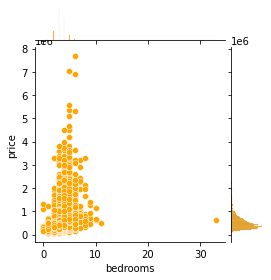

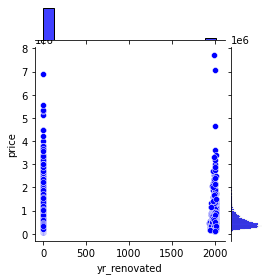

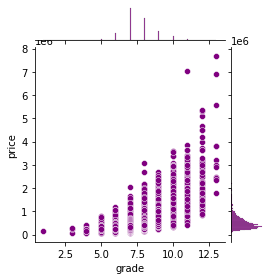

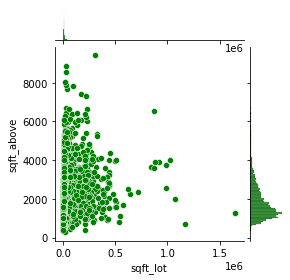

In [16]:
sb.jointplot(x='bedrooms',y='price',data=df,kind='scatter',size=4, color='orange')
sb.jointplot(x='yr_renovated',y='price',data=df,kind='scatter',size=4,color='blue')
sb.jointplot(x='grade',y='price',data=df,kind='scatter',size=4,color='purple')
sb.jointplot(x='sqft_lot',y='sqft_above',data=df,kind='scatter',size=4,color='green')

#### X(Independent variables) and y(target variables)

<AxesSubplot:>

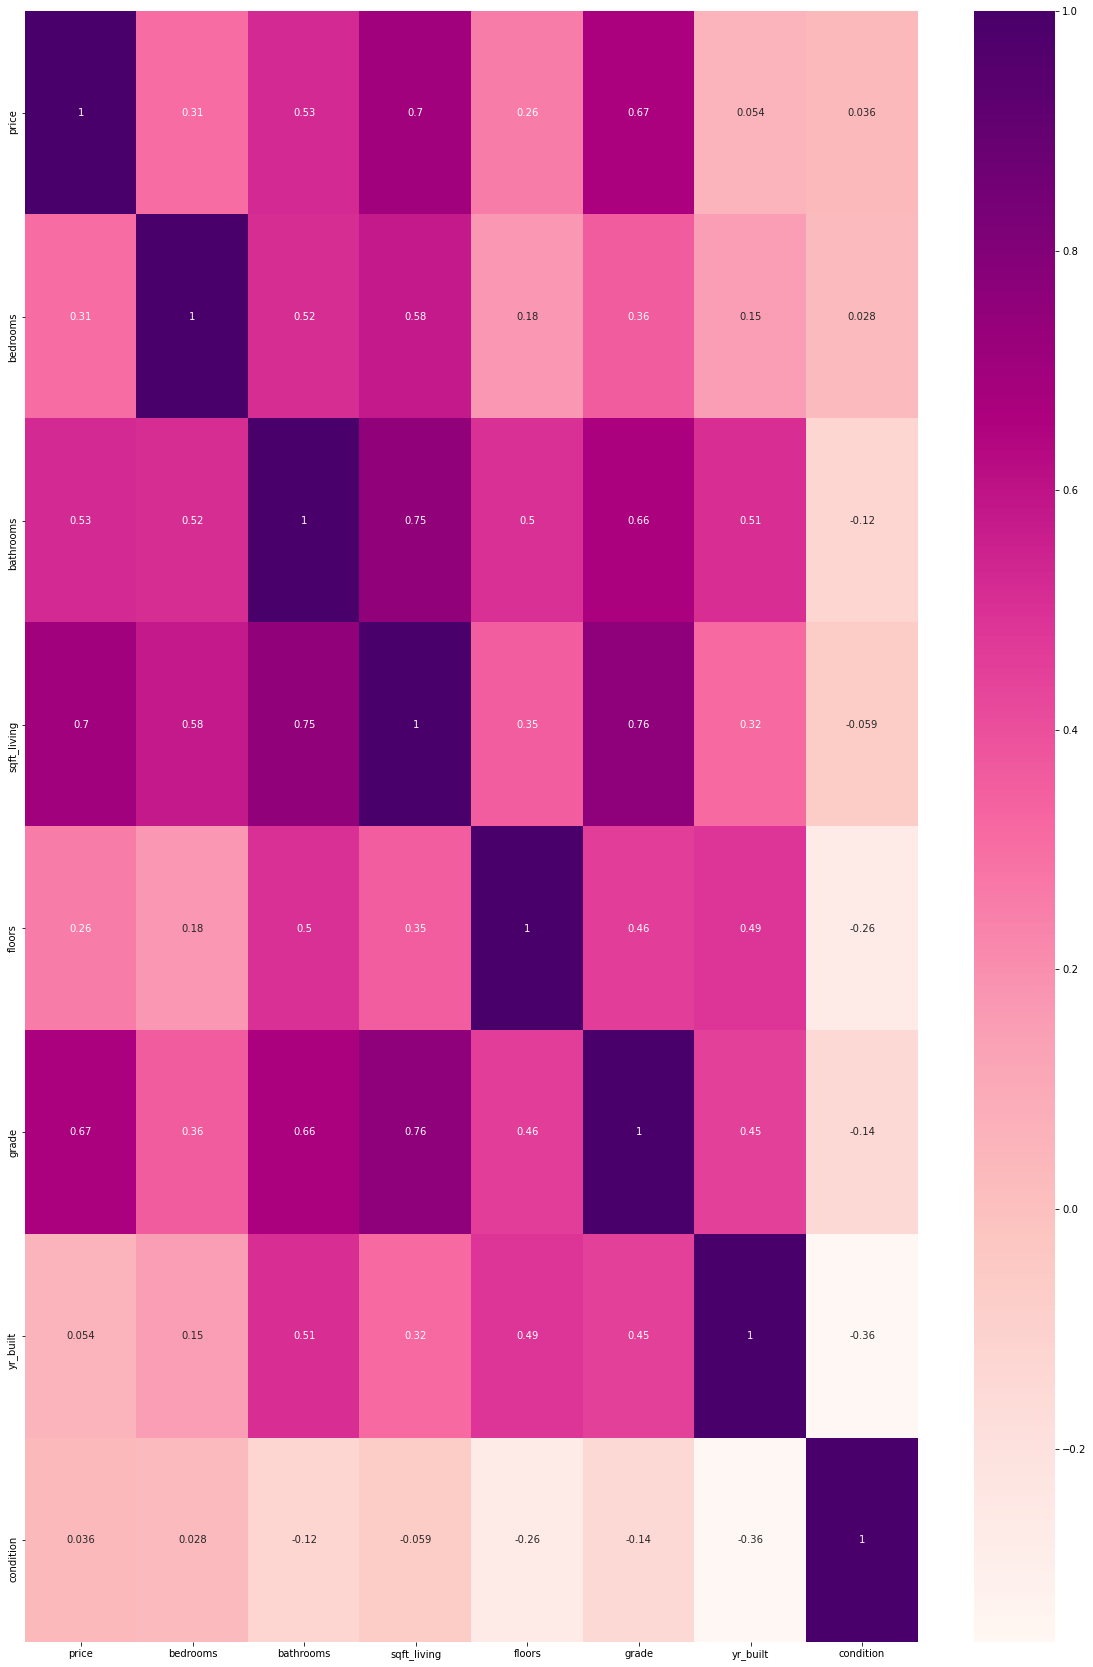

In [17]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
plt.figure(figsize=(20,30))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sb.heatmap(df[columns].corr(),cmap="RdPu",annot=True)

In [18]:
## some imports for the graphs
import itertools
import warnings
import statsmodels.api as sm
import matplotlib

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [19]:
df['date'] = [x[:8] for x in df['date']]
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

date_price = df[['date','price']]
date_price.sort_values('date', inplace=True)
date_price.groupby('date', as_index=False)
date_price['price'].sum()
date_price['price'].reset_index()
date_price.set_index('date', inplace=True)
print(date_price.index)

DatetimeIndex(['2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02',
               ...
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-14',
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-15',
               '2015-05-24', '2015-05-27'],
              dtype='datetime64[ns]', name='date', length=21613, freq=None)


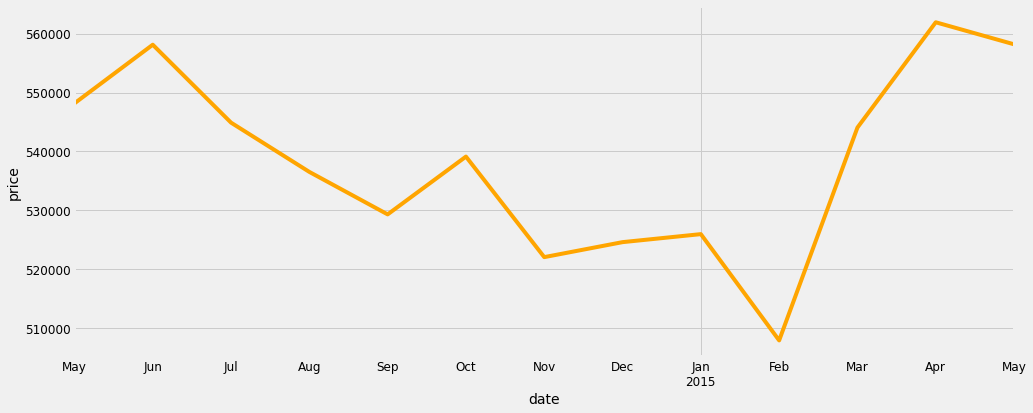

In [59]:
y = date_price['price'].resample('MS').mean()
y.plot(figsize=(15, 6),color='orange')
plt.ylabel("price")
plt.show()

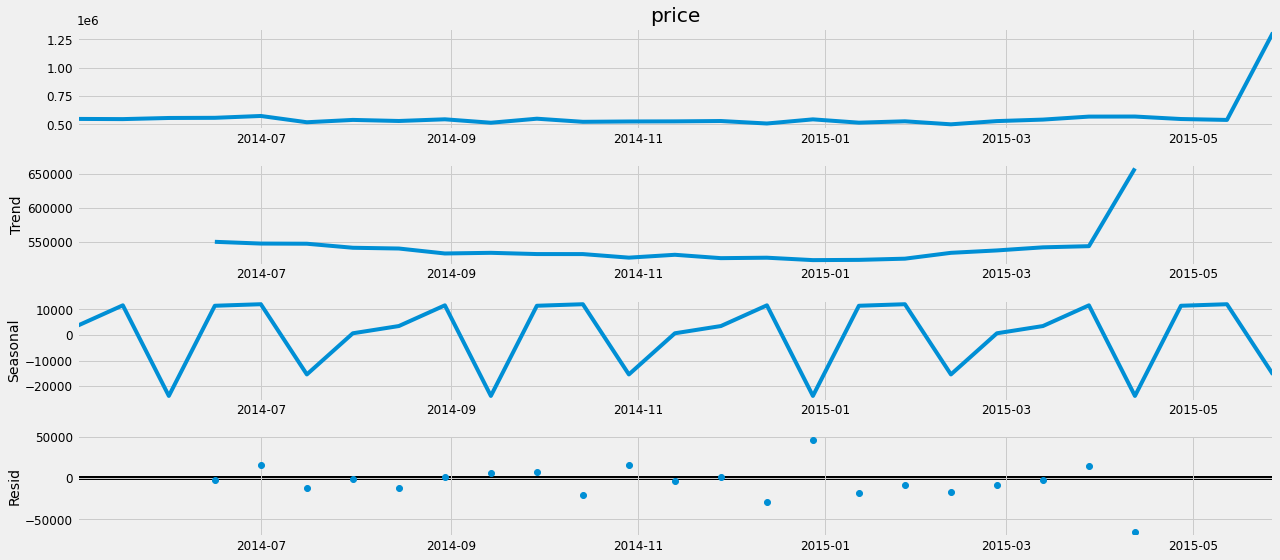

In [21]:
from pylab import rcParams
y = date_price['price'].resample('15d').mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Plotting no of floors vs price

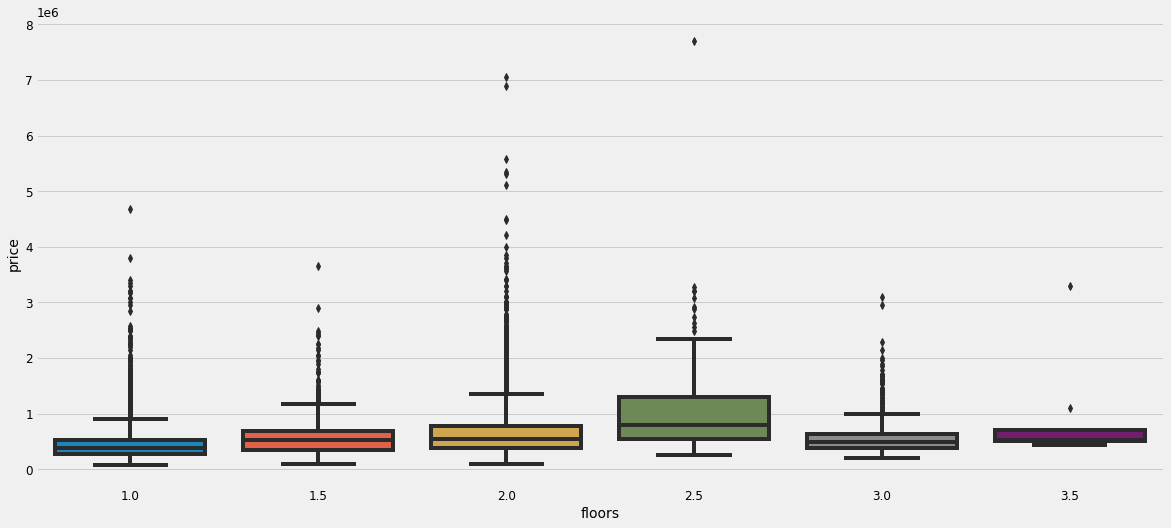

In [22]:
sb.boxplot(x=df.floors, y=df.price)
plt.show()

#### Plotting price vs 3 other attributes

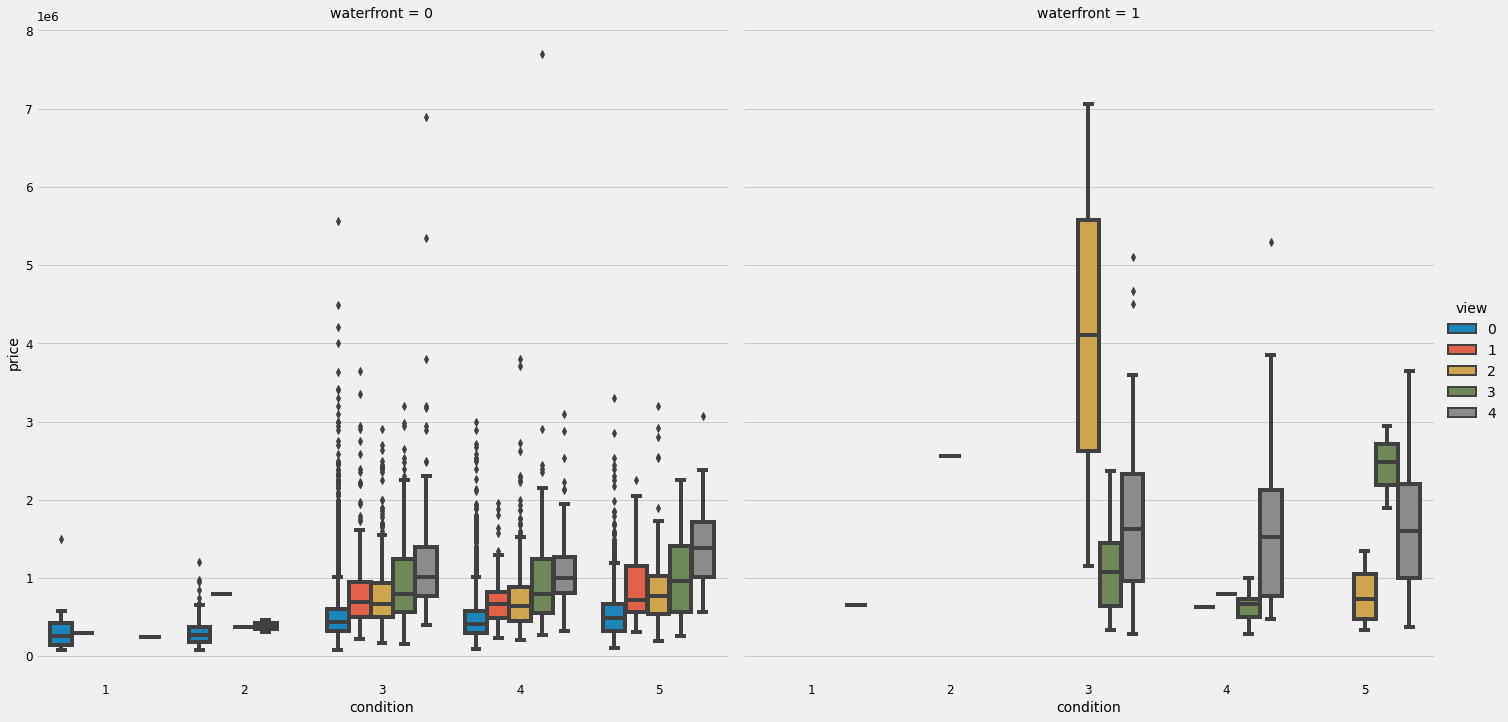

In [23]:
sb.catplot(x="condition", y="price", hue="view", col="waterfront", data=df, kind="box", height=10, aspect=1)
plt.show()

#### Plotting price vs year_built & grade

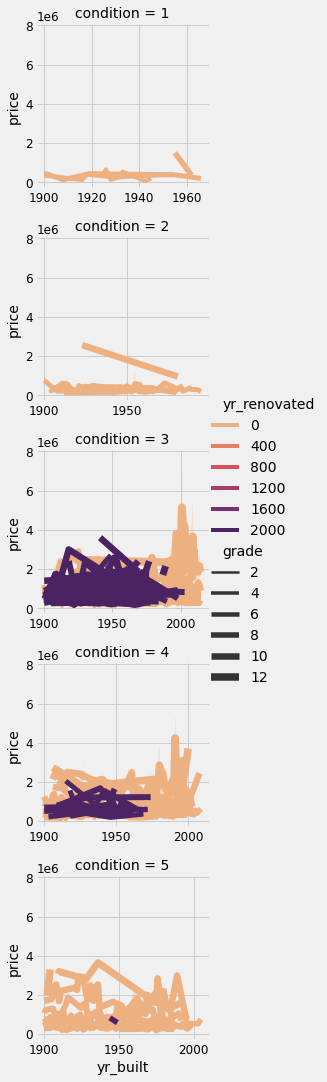

In [24]:
palette = sb.color_palette("flare", as_cmap=True)
sb.relplot(data=df, x="yr_built", y="price", hue="yr_renovated", size="grade", row="condition", kind="line", palette=palette, height=3, aspect=1, facet_kws=dict(sharex=False))
plt.show()

#### Price cumultative (over the years) in different grades

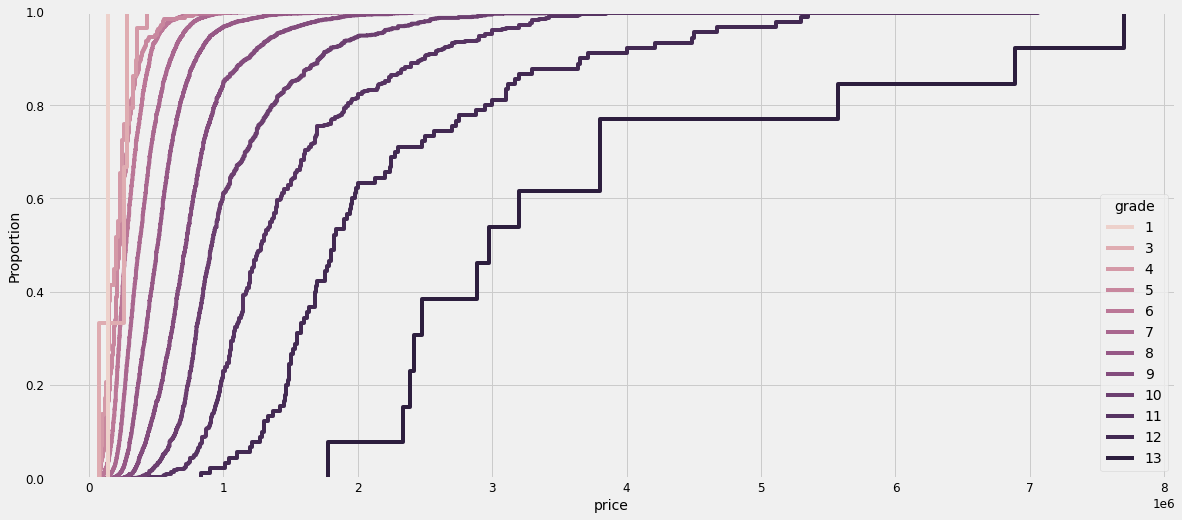

In [25]:
sb.ecdfplot(data=df, x="price", hue="grade")
plt.show()

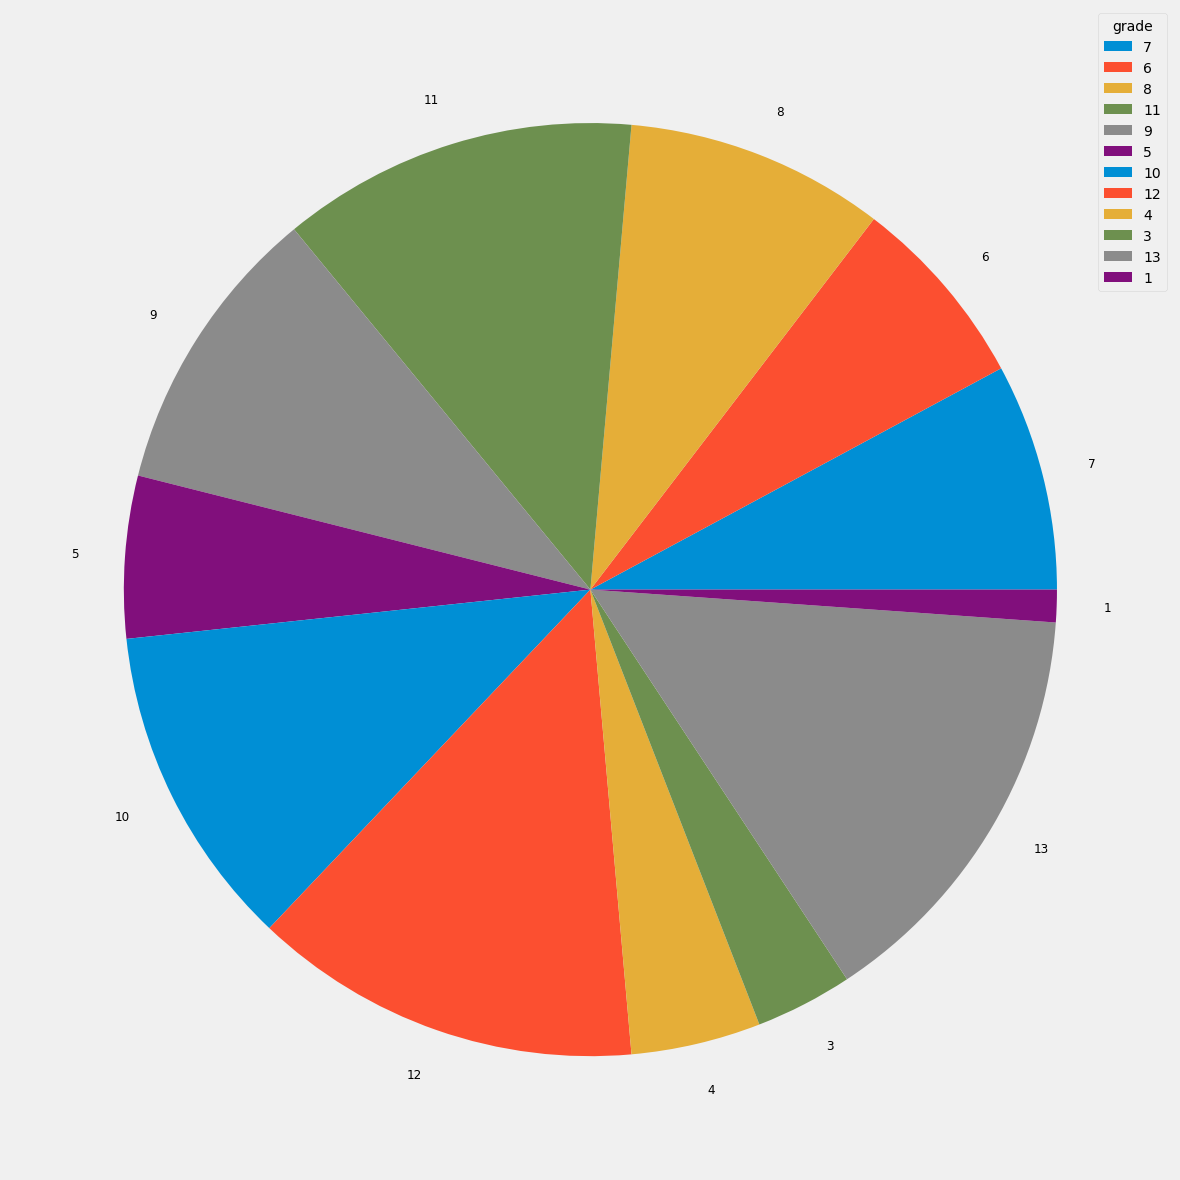

In [26]:
plt.rcParams["figure.figsize"] = (20,20)
gradee = list(dict.fromkeys(df['grade']))
plt.pie(gradee, labels=gradee)
plt.legend(title='grade')
plt.show()

## Preprocessing

### Dropping  Unnecessary Columns

In [27]:
df.drop(labels=['id', 'date','Location', 'zipcode'], axis=1, inplace=True)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Analyzing the DATA

In [29]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [30]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

## Model Training

In [31]:
# X(Independent variables) and y(target variables) 
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [32]:
#Splitting the data into train,test data 
seed=0
t_test=0.20
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.10, random_state = seed)

## Deployment Of Machine Learning Algorithms

## Regression Algorithms:

### 1. Multi-Linear Regression:

In [33]:
mlr = LinearRegression()
mlr.fit(X_train,Y_train)
mlr_score = round(mlr.score(X_test,Y_test)*100)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,Y_test)
print("Multiple Linear Regression Model Score is: ", mlr_score)

Multiple Linear Regression Model Score is:  69


### 2. Random Forest Regression:


In [34]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,Y_train)
rf_regressor.score(X_test,Y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=round(rf_regressor.score(X_test,Y_test)*100)
expl_rf = explained_variance_score(rf_pred,Y_test)
print("Random Forest Regression Model Score is :",rf_score)

Random Forest Regression Model Score is : 88


### 3. Decision Tree Regression:


In [35]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,Y_train)
tr_regressor.score(X_test,Y_test)
pred_tr = tr_regressor.predict(X_test)
tr_score=round(tr_regressor.score(X_test,Y_test)*100)
expl_tr = explained_variance_score(pred_tr,Y_test)
print("Decision tree  Regression Model Score is: ",tr_score)

Decision tree  Regression Model Score is:  75


## Comparing Regression Models:

In [36]:
#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,tr_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=True)

,Model,Score,Explained Variance Score
0,Multiple Linear Regression,69,0.570220
1,Decision Tree,75,0.767876
2,Random forest Regression,88,0.855463


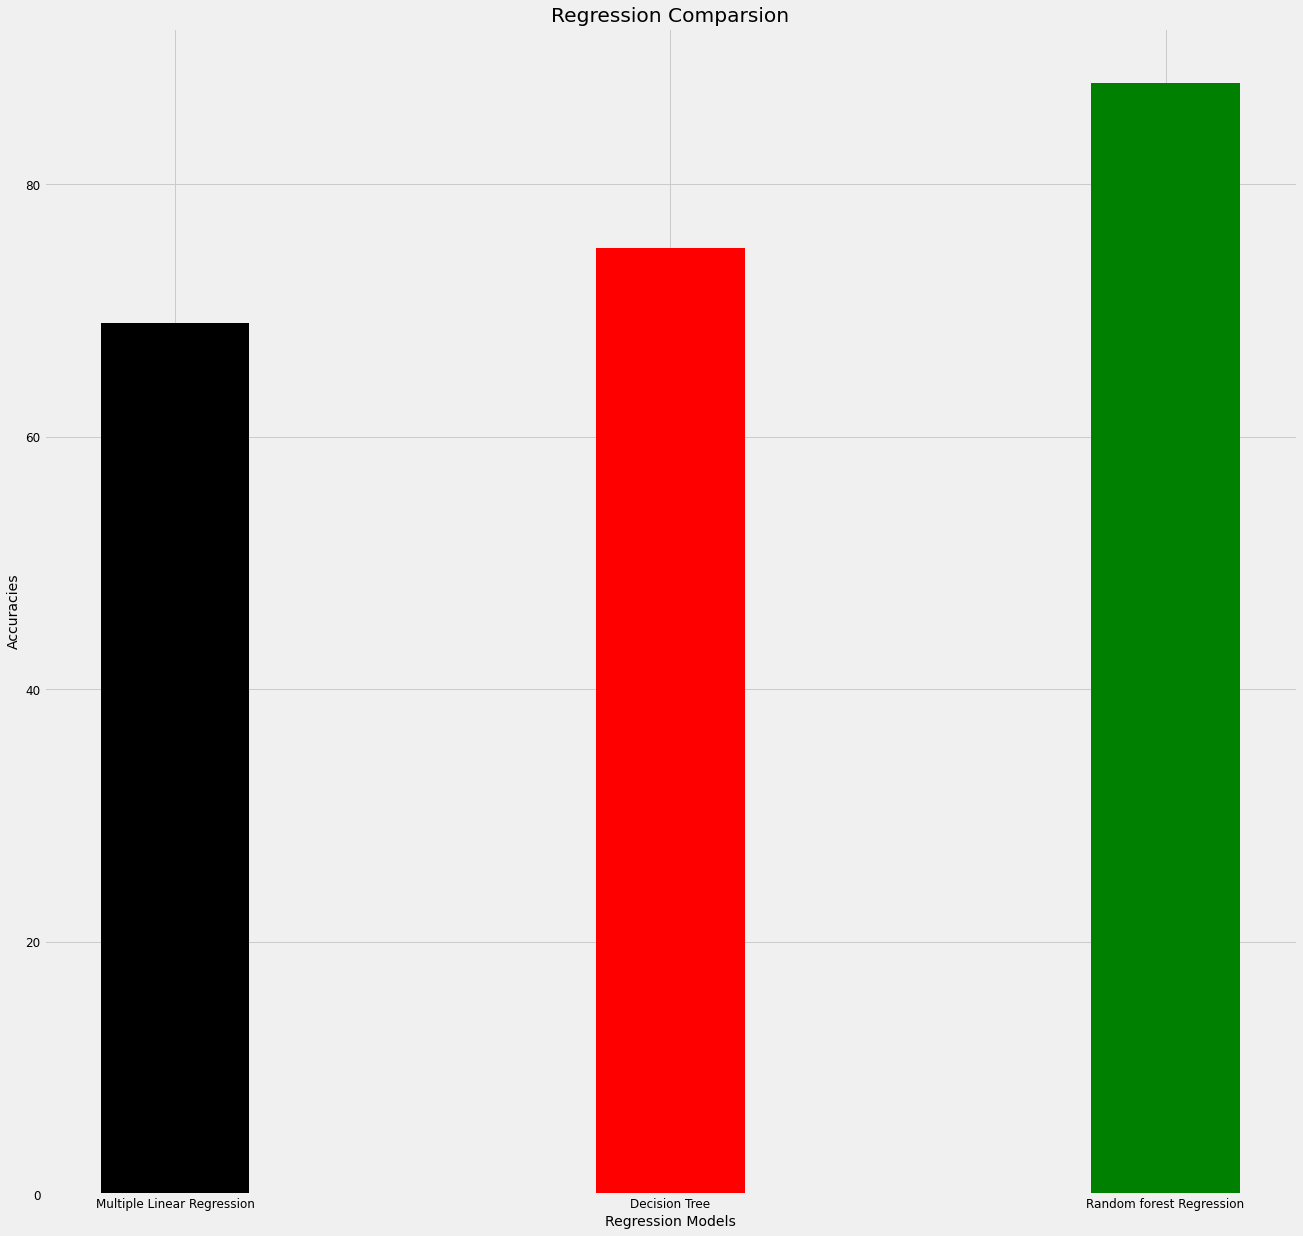

In [37]:
x=['Multiple Linear Regression','Decision Tree','Random forest Regression']
y=[mlr_score,tr_score,rf_score]
plt.bar(x, y,color=['black', 'red', 'green',],width = 0.3)
 
plt.xlabel("Regression Models")
plt.ylabel("Accuracies")
plt.title("Regression Comparsion")
plt.show()

In [38]:
Reg_list=[mlr_score,tr_score,rf_score]
max1 = Reg_list[0]
for i in range(3):
    if Reg_list[i] > max1:
        max1 = Reg_list[i]
        
    
print("Most accurate Regression Model is Random Forest:",max1)

Most accurate Regression Model is Random Forest: 88


In [39]:
df1=df.copy()

In [40]:
list2=[]
list2=df1['yr_built'].unique()
list2.sort()
print(list2)

[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]


In [41]:
df1['yr_built'].replace([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 
                         1911, 1912, 1913, 1914, 1915, 1916, 1917,
1918, 1919, 1920, 1921,1922, 1923, 1924, 1925, 1926, 1927,
 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
 1998, 1999],1900,inplace=True)
df1['yr_built'].replace([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],2000,inplace=True)

In [42]:
df1['yr_built'].value_counts()

1900    16854
2000     4759
Name: yr_built, dtype: int64

## Logistic Regression

### Query: Predict if House needs renovation depending upon when the House was Built(1900s or 2000s)

In [43]:
# X(Independent variables) and y(target variables) 
X=df1.loc[:,df1.columns!='yr_built']
Y = df1.iloc[:,12].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.10,random_state=7)

In [44]:
lr = LogisticRegression()
model = lr.fit(X_train, Y_train)
prediction_lr = model.predict(X_test)
print("Accuracy on train: ", lr.score(X_train, Y_train)*100)
print("Accuracy on test: ", lr.score(X_test, Y_test)*100)
print("\n\n")
print("Confusion Matrix: ",confusion_matrix(Y_test, prediction_lr))

Accuracy on train:  80.28379003650198
Accuracy on test:  79.60222016651248



Confusion Matrix:  [[1617   74]
 [ 367  104]]


In [45]:
pred = lr.predict([[32300, 2, 3, 1680, 6819, 2, 0, 0, 4, 7, 1715, 0, 0, 47.69, -122.292, 1780, 10208]])
print(pred)
if pred==1900:
    print("House needs Renovation!")
else:
    print("Does Not Require Renovation!")

[1900]
House needs Renovation!


## Classification Algorithms

In [46]:
X = df.iloc[:,0:].values
Y = df.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

## Naive Bayes Algorithm

In [47]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
Nb_predictions = NB.predict(X_test)
print("Naive bayes algorithm accuracy is:",(accuracy_score(Y_test, Nb_predictions)))

Naive bayes algorithm accuracy is: 0.8043025676613463


## Decision Tree Algorithm

In [48]:
dt = DecisionTreeClassifier( criterion='entropy')
dt.fit(X_train, Y_train)
dt_predictions = dt.predict(X_test)
print("Decision Tree Algorithm Accuracy: ",(accuracy_score(Y_test, dt_predictions)))

Decision Tree Algorithm Accuracy:  0.8140180430256766


### Comparing Classification Models

In [56]:
#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Decision Tree','Naive Bayes'],
                            'Score':[(accuracy_score(Y_test, dt_predictions)*100),(accuracy_score(Y_test, Nb_predictions)*100)]
                           })
models_score.sort_values(by='Score',ascending=True)

,Model,Score
1,Naive Bayes,80.430257
0,Decision Tree,81.401804


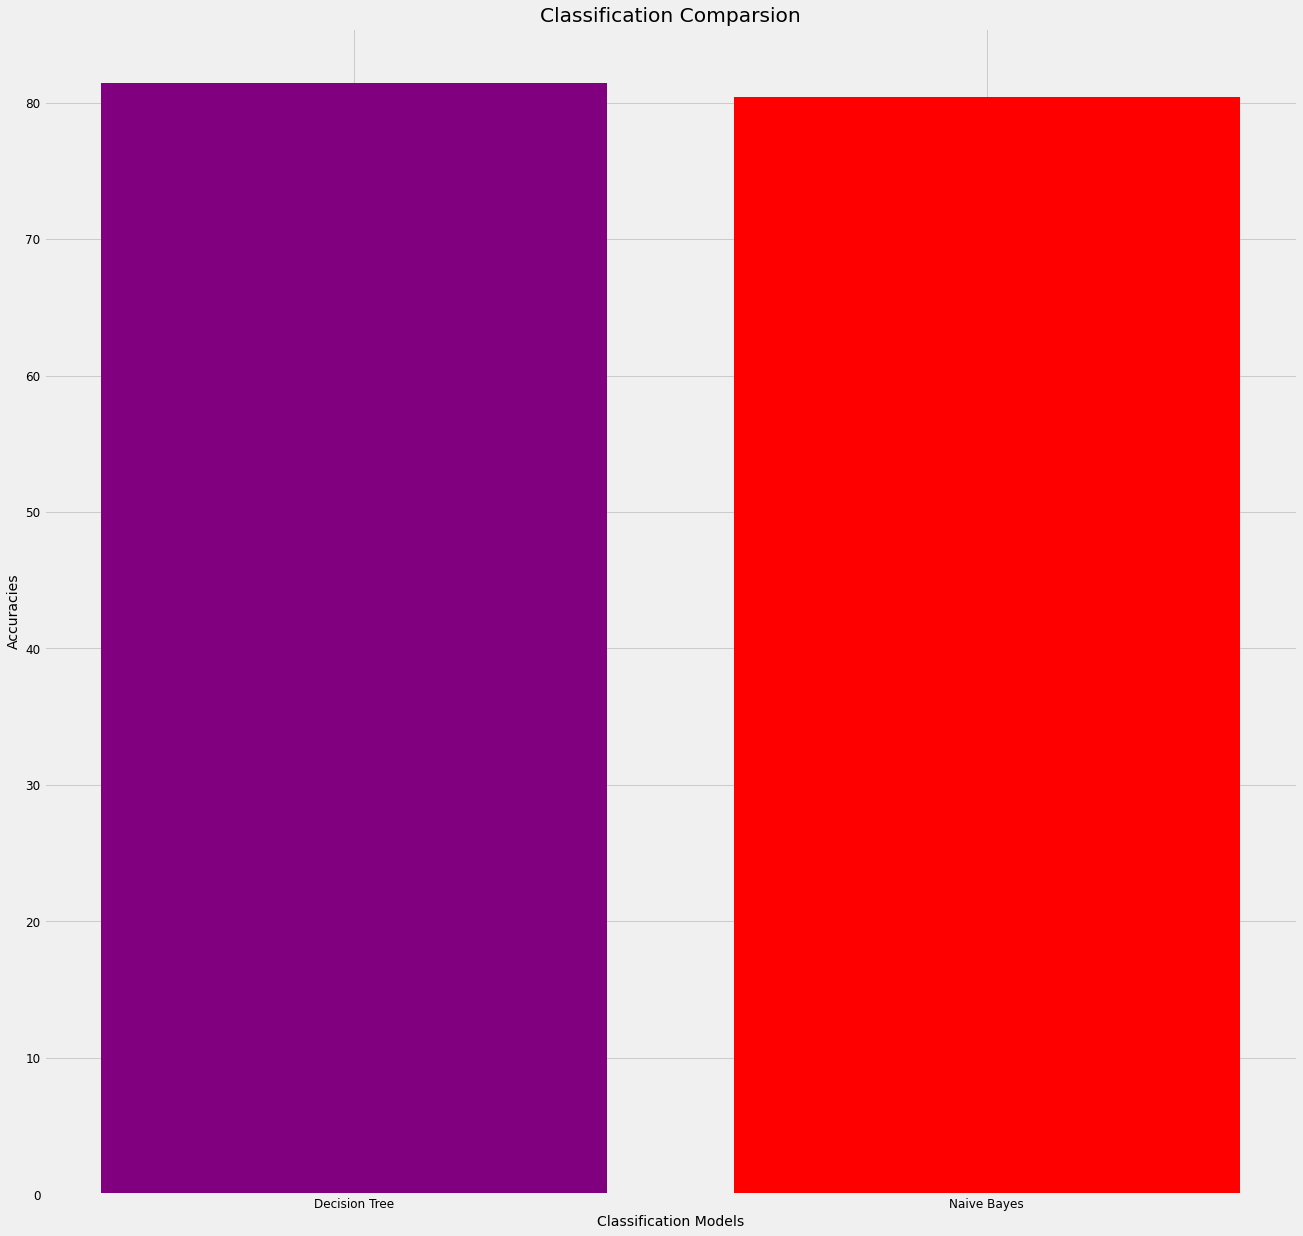

In [57]:
x=['Decision Tree','Naive Bayes']
y=[(accuracy_score(Y_test, dt_predictions)*100),(accuracy_score(Y_test, Nb_predictions)*100)]
plt.bar(x, y,color=['purple', 'red'])
 
plt.xlabel("Classification Models")
plt.ylabel("Accuracies")
plt.title("Classification Comparsion")
plt.show()

## KMeans Algorithm

In [50]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
df_scaled = standard.fit_transform(df)
pd.DataFrame(df_scaled)
pd.DataFrame(df_scaled).describe()
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)
kmeans.inertia_

313137.3697338319

## Kmeans Algorithm Plots

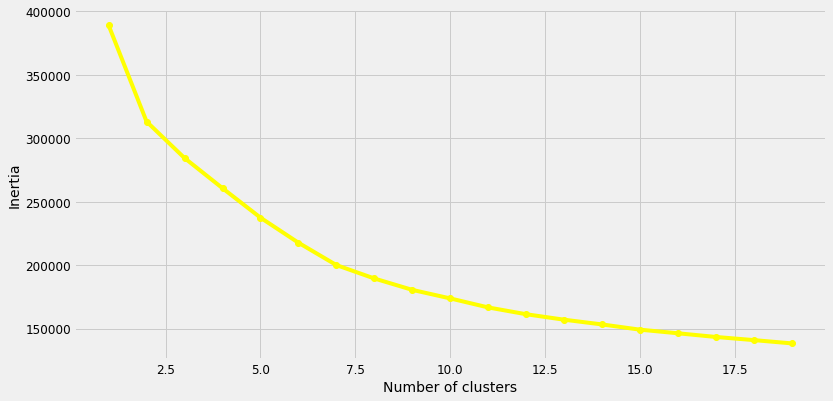

In [58]:
import pandas as pd
SSE = []   
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o',color='yellow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df_scaled)
label=kmeans.fit_predict(df_scaled)
pred = kmeans.predict(df_scaled)
frame = pd.DataFrame(df_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    7939
1    6143
0    4670
2    2698
3     163
Name: cluster, dtype: int64

In [65]:
label

array([4, 0, 4, ..., 4, 1, 4])

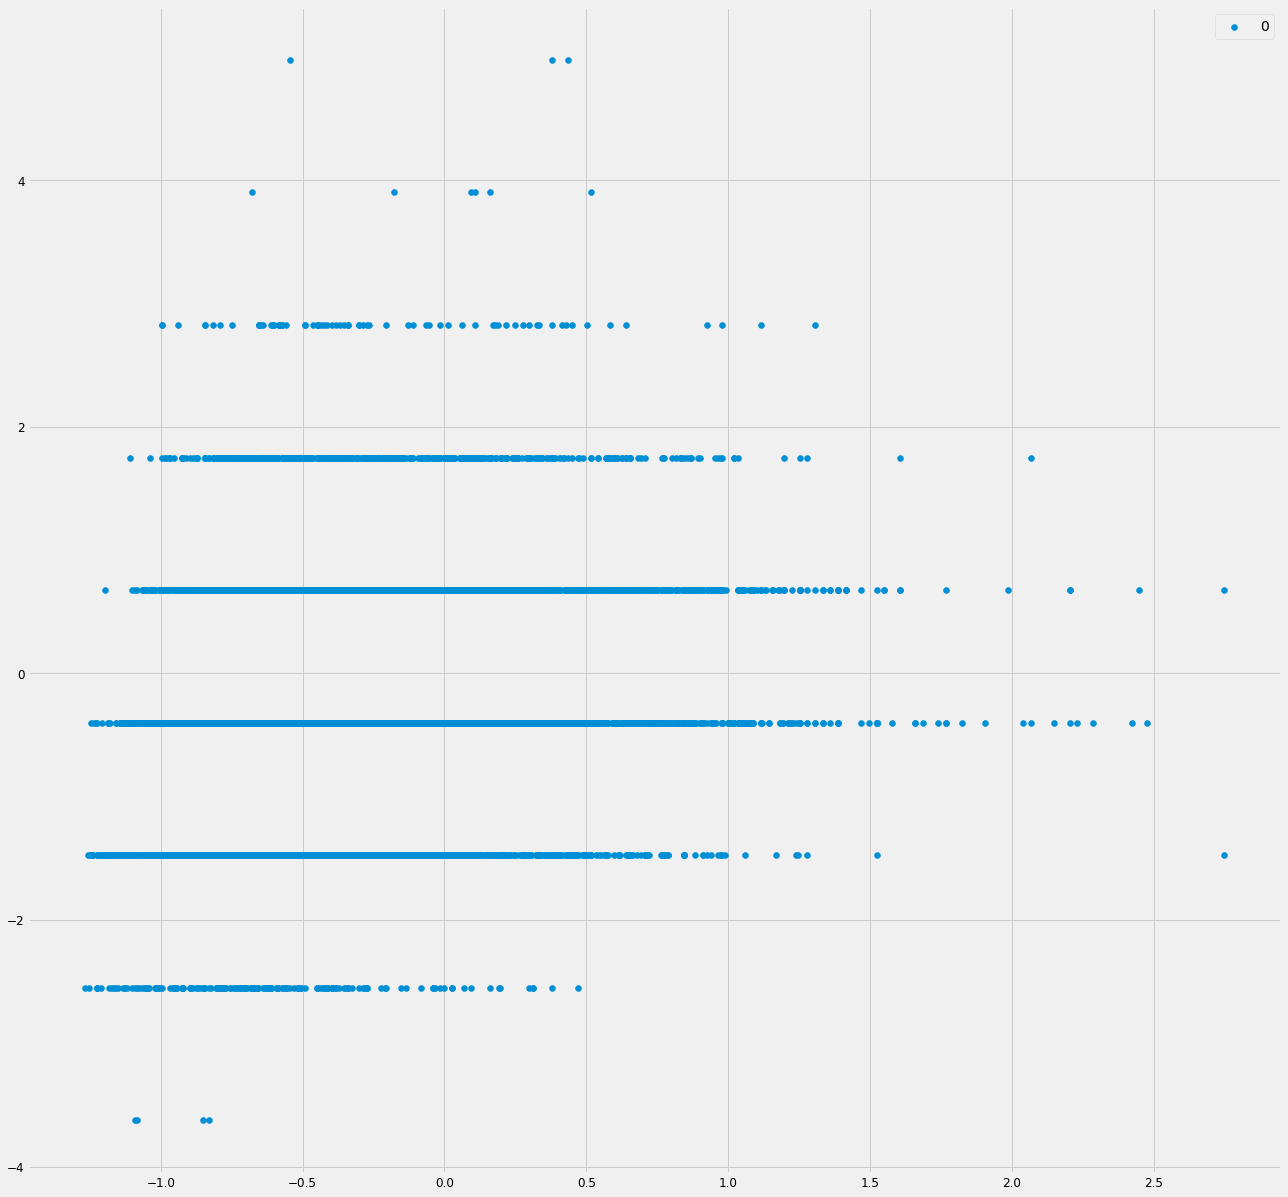

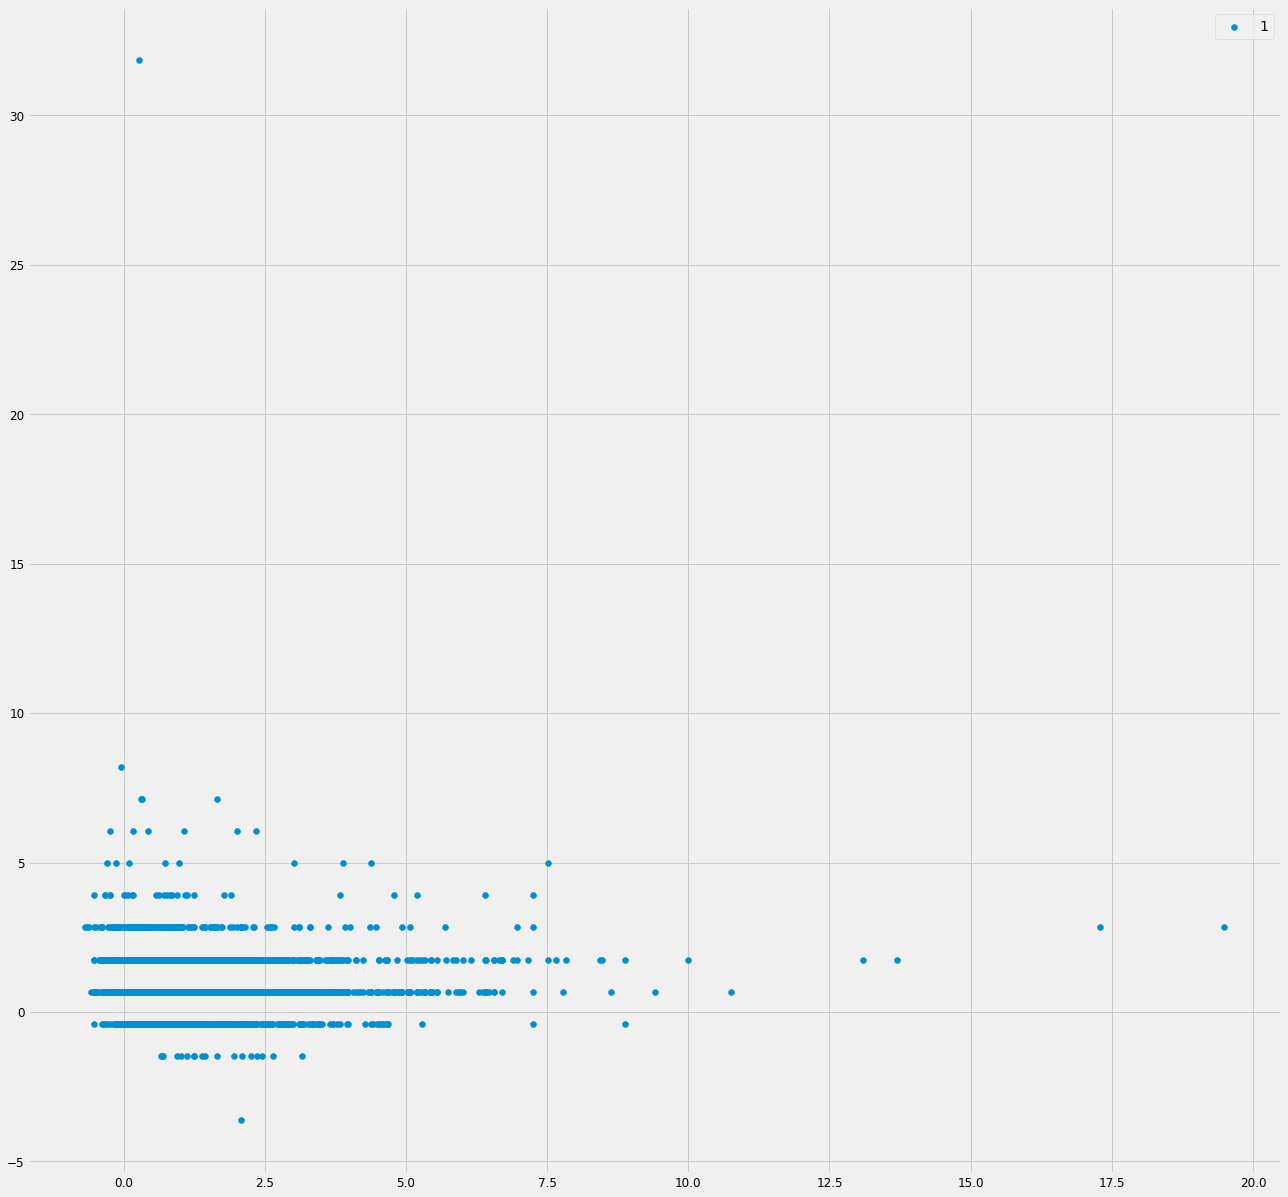

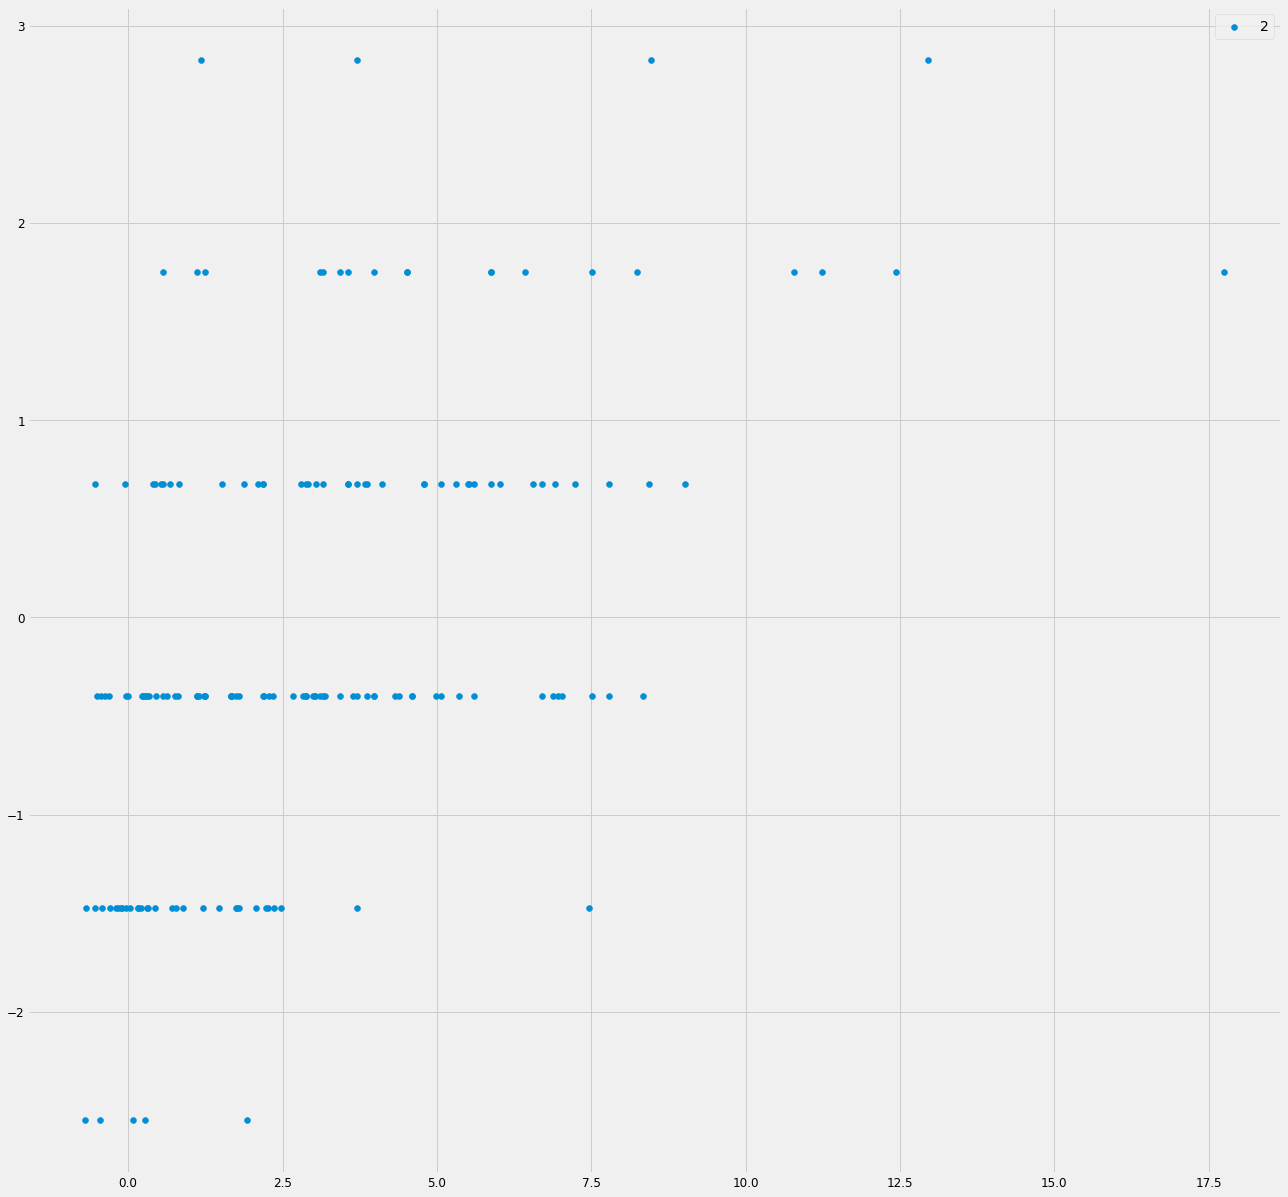

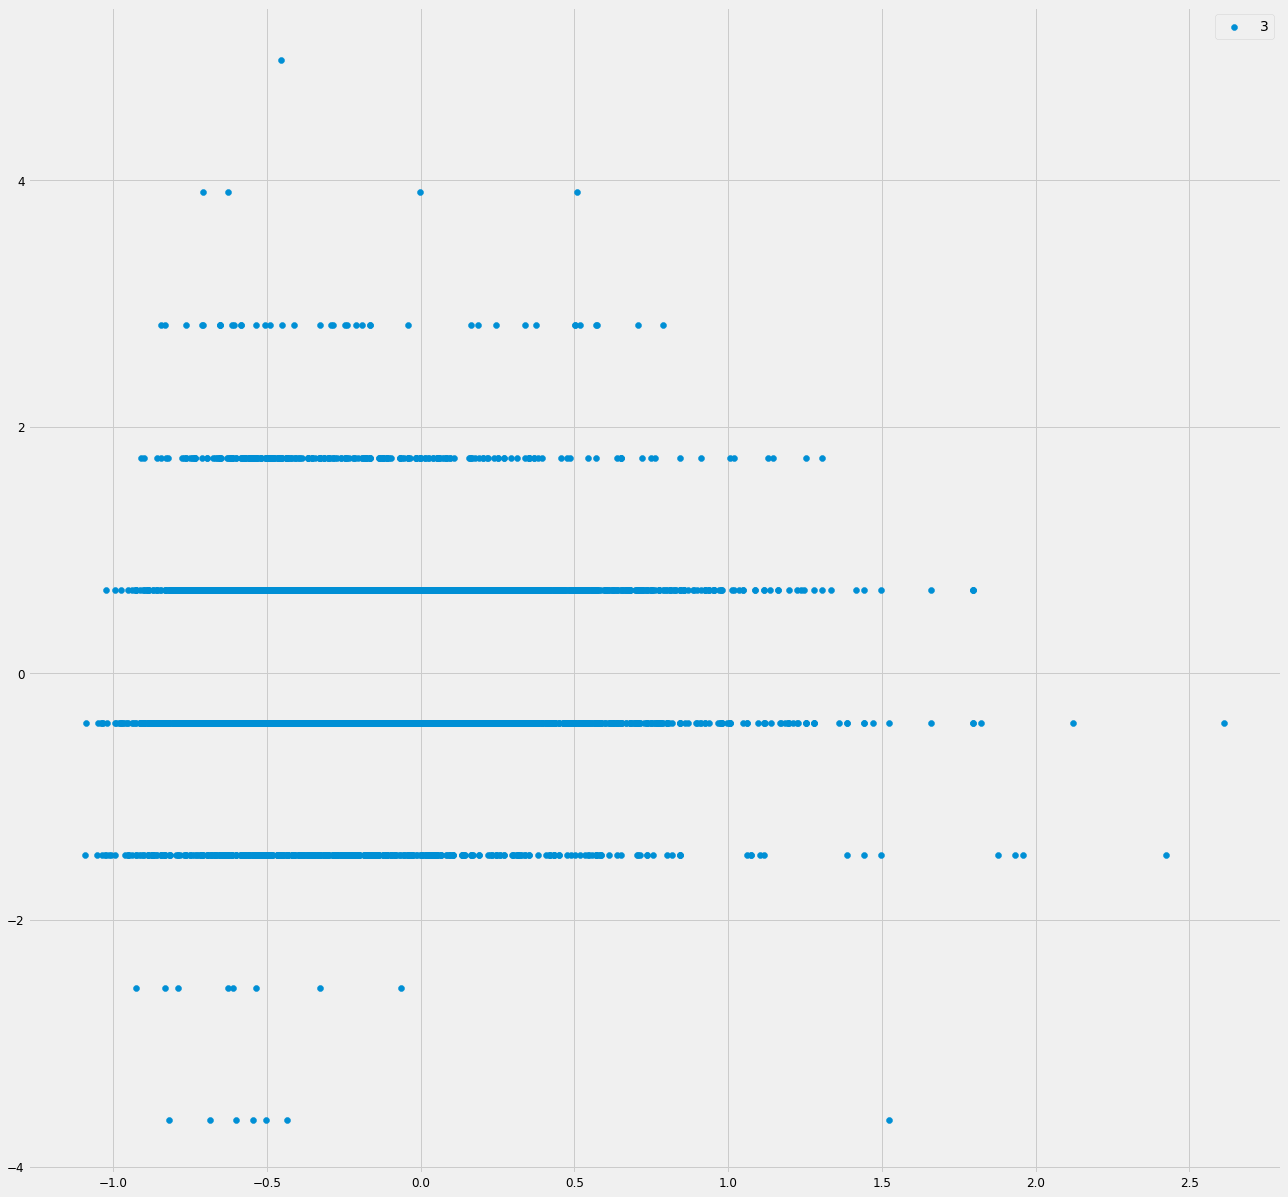

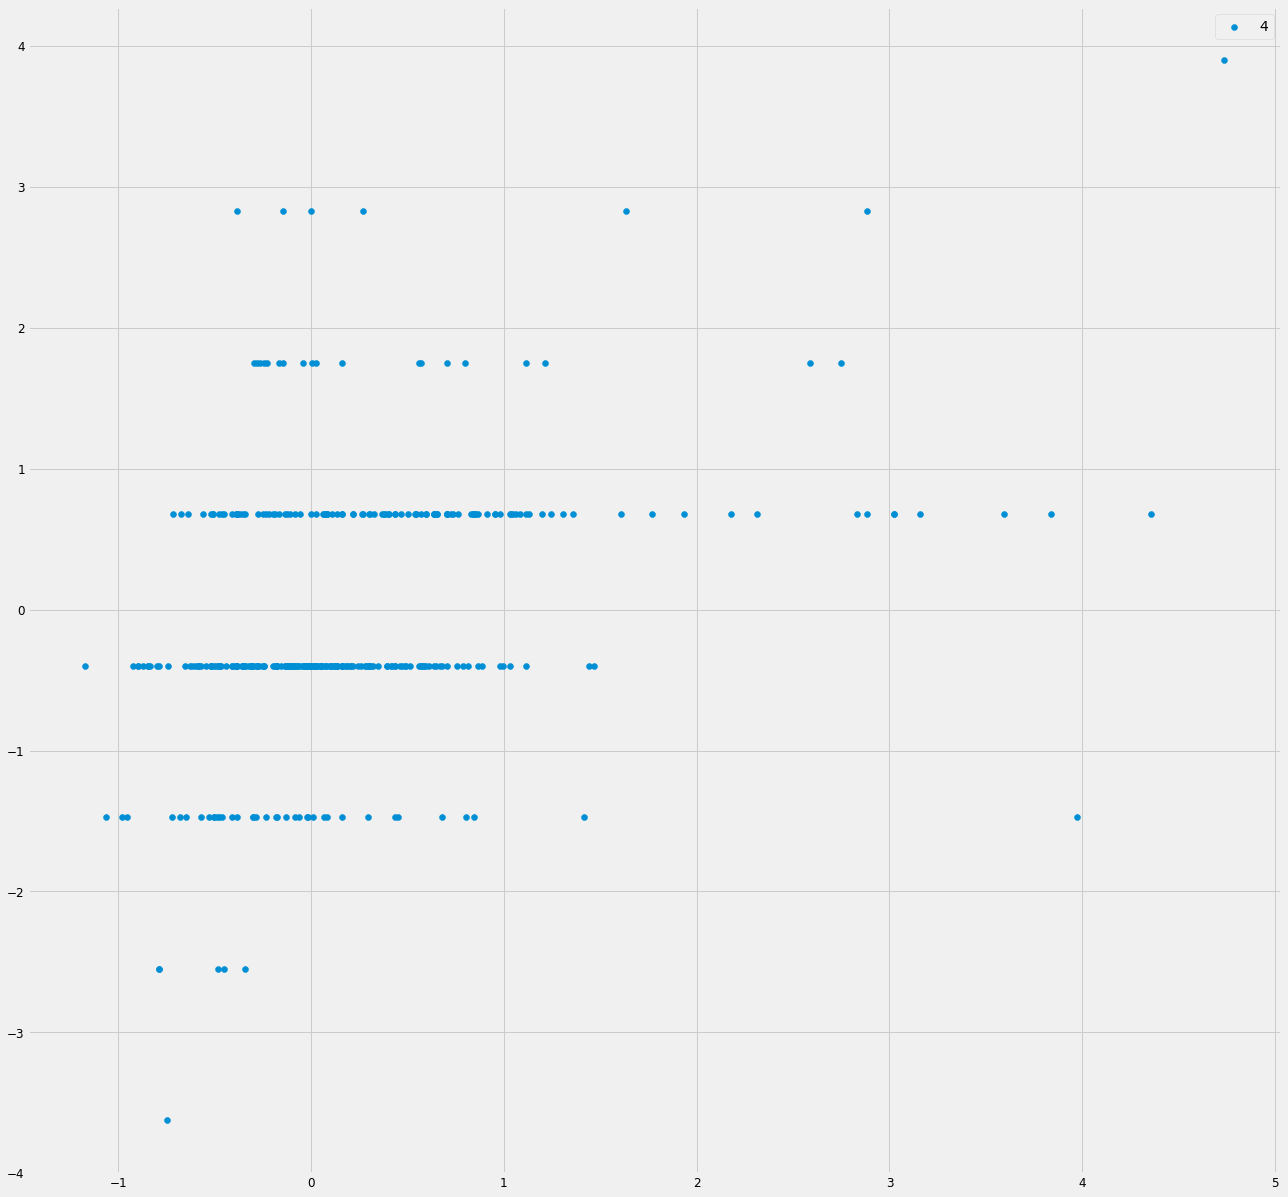

In [62]:
u_labels = np.unique(label)

for i in u_labels:

    plt.scatter(df_scaled[label == i , 0] , df_scaled[label == i , 1] , label = i, color='')

    plt.legend()

    plt.show()

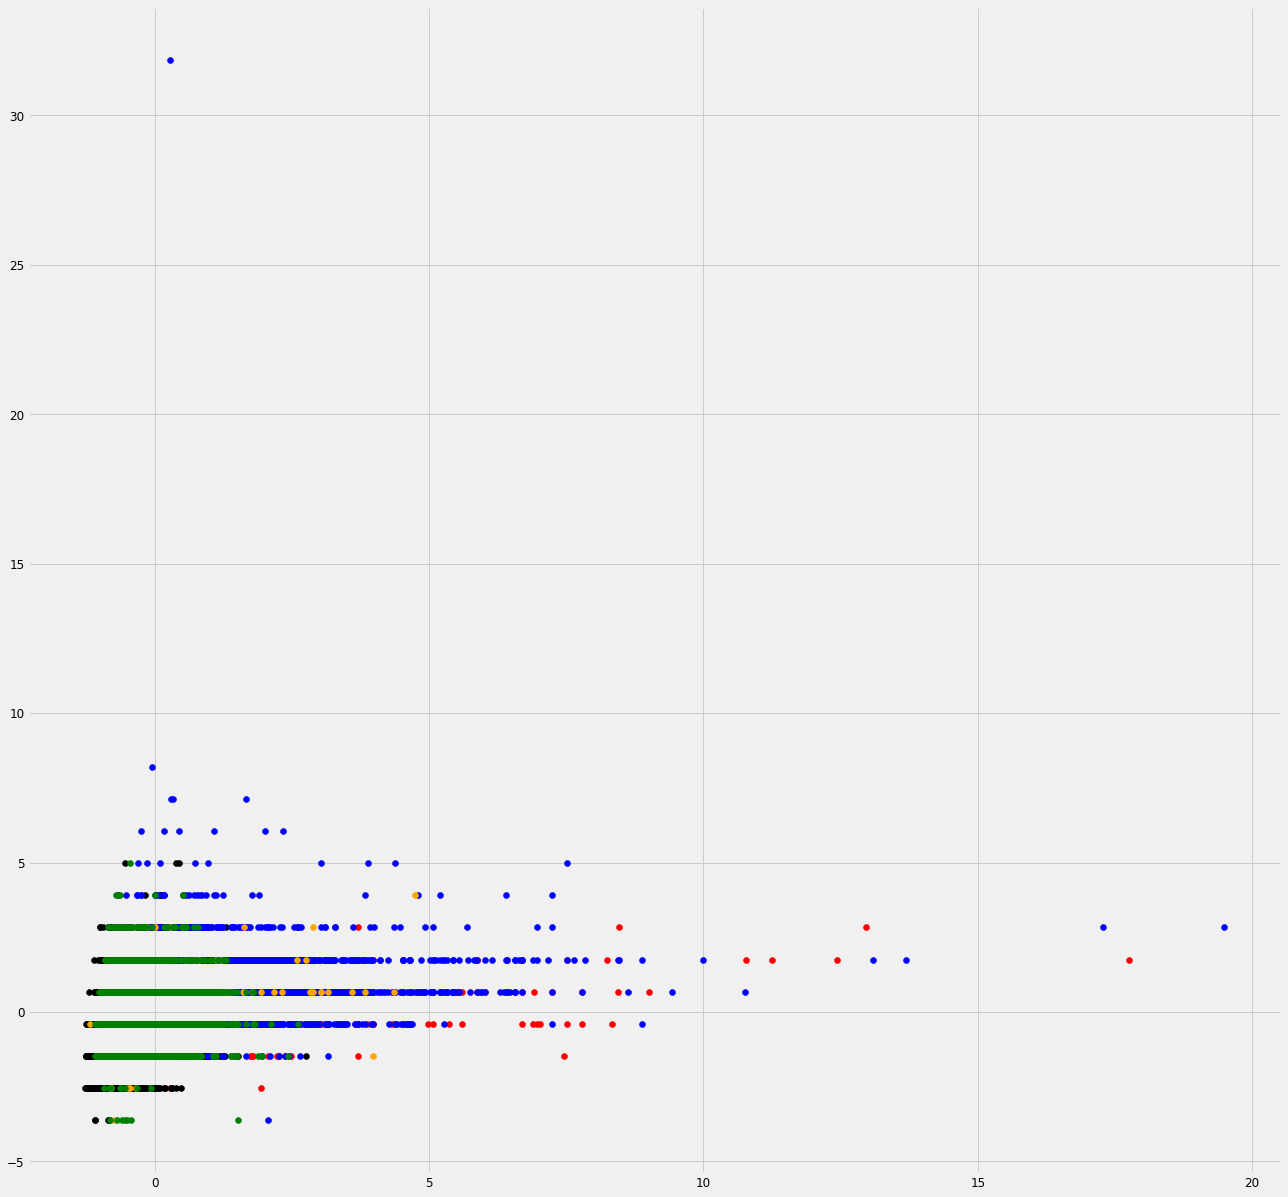

In [63]:
#filter rows of original data
filtered_label2 = df_scaled[label == 2]
filtered_label0 = df_scaled[label == 0]
filtered_label1 = df_scaled[label == 1]
filtered_label4 = df_scaled[label == 4]
filtered_label3 = df_scaled[label == 3]

 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'black')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'orange')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.show()
